# Random Forest

Notebook used to evaluate different hyperparameters to maximize classification performance

In [0]:
from pyspark.sql import types, Window, functions as F
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.ml.feature import VectorAssembler, StringIndexer, StringIndexerModel
from sparkdl.xgboost import XgboostClassifier, XgboostClassifierModel
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier
from pyspark.mllib.evaluation import MulticlassMetrics

In [0]:
blob_container = "main-storage" # The name of your container created in https://portal.azure.com
storage_account = "team05w261" # The name of your Storage account created in https://portal.azure.com
secret_scope = "team05" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "team05-key" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

# Configure blob storage account access key globally
spark.conf.set(
  f"fs.azure.account.key.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

df = spark.read.parquet(f"{blob_url}/all_time_full_join_6")

df_numrows = df.count()
print(f"number of rows: {df_numrows}")
print(f"number of columns: {len(df.columns)}")
display(df)

number of rows: 31178801
number of columns: 362

YEAR_AIRLNS QUARTER_AIRLNS MONTH_AIRLNS DAY_OF_MONTH_AIRLNS DAY_OF_WEEK_AIRLNS FL_DATE_AIRLNS CRS_DEP_TIME_AIRLNS CRS_ARR_TIME_AIRLNS CRS_ELAPSED_TIME_AIRLNS ORIGIN_AIRLNS DEST_AIRLNS OP_UNIQUE_CARRIER_AIRLNS FLIGHTS_AIRLNS DISTANCE_AIRLNS DEP_DEL15_AIRLNS LATITUDE_WTHR_origin LONGITUDE_WTHR_origin ELEVATION_WTHR_origin LATITUDE_WTHR_dest LONGITUDE_WTHR_dest ELEVATION_WTHR_dest WND_WTHR_direction_angle_origin WND_WTHR_speed_rate_origin CIG_WTHR_ceiling_height_dimension_origin VIS_WTHR_distance_dimension_origin TMP_WTHR_air_temperature_origin DEW_WTHR_dew_point_temperature_origin SLP_WTHR_sea_level_pressure_origin GA1_WTHR_base_height_dimension_origin GF1_WTHR_lowest_cloud_base_height_dimension_origin MA1_WTHR_altimeter_setting_rate_origin MA1_WTHR_station_pressure_rate_origin AA1_WTHR_period_quantity_in_hours_origin AA1_WTHR_depth_dimension_origin AA2_WTHR_period_quantity_in_hours_origin AA2_WTHR_depth_dimension_origin AJ1_WTHR_dimension_origin AJ1_WTHR_equivalent_water_depth_dimension_origin AL1_WTHR_period_quantity_origin AL1_WTHR_depth_dimension_origin AN1_WTHR_period_quantity_origin AN1_WTHR_depth_dimension_origin AO1_WTHR_period_quantity_in_minutes_origin AO1_WTHR_depth_dimension_origin WND_WTHR_direction_angle_dest WND_WTHR_speed_rate_dest CIG_WTHR_ceiling_height_dimension_dest VIS_WTHR_distance_dimension_dest TMP_WTHR_air_temperature_dest DEW_WTHR_dew_point_temperature_dest SLP_WTHR_sea_level_pressure_dest GA1_WTHR_base_height_dimension_dest GF1_WTHR_lowest_cloud_base_height_dimension_dest MA1_WTHR_altimeter_setting_rate_dest MA1_WTHR_station_pressure_rate_dest AA1_WTHR_period_quantity_in_hours_dest AA1_WTHR_depth_dimension_dest AA2_WTHR_period_quantity_in_hours_dest AA2_WTHR_depth_dimension_dest AJ1_WTHR_dimension_dest AJ1_WTHR_equivalent_water_depth_dimension_dest AL1_WTHR_period_quantity_dest AL1_WTHR_depth_dimension_dest AN1_WTHR_period_quantity_dest AN1_WTHR_depth_dimension_dest AO1_WTHR_period_quantity_in_minutes_dest AO1_WTHR_depth_dimension_dest WND_WTHR_type_code_origin-V WND_WTHR_type_code_origin-C WND_WTHR_type_code_origin-N WND_WTHR_type_code_origin-R WND_WTHR_type_code_origin-H CIG_WTHR_ceiling_determination_code_origin-M CIG_WTHR_ceiling_determination_code_origin-C CIG_WTHR_ceiling_determination_code_origin-W CIG_WTHR_CAVOK_code_origin-Y CIG_WTHR_CAVOK_code_origin-N GA1_WTHR_coverage_code_origin-00 GA1_WTHR_coverage_code_origin-01 GA1_WTHR_coverage_code_origin-02 GA1_WTHR_coverage_code_origin-03 GA1_WTHR_coverage_code_origin-04 GA1_WTHR_coverage_code_origin-05 GA1_WTHR_coverage_code_origin-06 GA1_WTHR_coverage_code_origin-07 GA1_WTHR_coverage_code_origin-08 GA1_WTHR_coverage_code_origin-09 GA1_WTHR_coverage_code_origin-10 GA1_WTHR_cloud_type_code_origin-00 GA1_WTHR_cloud_type_code_origin-01 GA1_WTHR_cloud_type_code_origin-02 GA1_WTHR_cloud_type_code_origin-03 GA1_WTHR_cloud_type_code_origin-04 GA1_WTHR_cloud_type_code_origin-05 GA1_WTHR_cloud_type_code_origin-06 GA1_WTHR_cloud_type_code_origin-07 GA1_WTHR_cloud_type_code_origin-08 GA1_WTHR_cloud_type_code_origin-09 GA1_WTHR_cloud_type_code_origin-10 GA1_WTHR_cloud_type_code_origin-12 GA1_WTHR_cloud_type_code_origin-15 GF1_WTHR_total_coverage_code_origin-00 GF1_WTHR_total_coverage_code_origin-01 GF1_WTHR_total_coverage_code_origin-02 GF1_WTHR_total_coverage_code_origin-03 GF1_WTHR_total_coverage_code_origin-04 GF1_WTHR_total_coverage_code_origin-05 GF1_WTHR_total_coverage_code_origin-06 GF1_WTHR_total_coverage_code_origin-07 GF1_WTHR_total_coverage_code_origin-08 GF1_WTHR_total_coverage_code_origin-09 GF1_WTHR_total_lowest_cloud_cover_code_origin-00 GF1_WTHR_total_lowest_cloud_cover_code_origin-01 GF1_WTHR_total_lowest_cloud_cover_code_origin-02 GF1_WTHR_total_lowest_cloud_cover_code_origin-03 GF1_WTHR_total_lowest_cloud_cover_code_origin-04 GF1_WTHR_total_lowest_cloud_cover_code_origin-05 GF1_WTHR_total_lowest_cloud_cover_code_origin-06 GF1_WTHR_total_lowest_cloud_cover_code_origin-07 GF1_WTHR_total_lowest_cloud_cover_code_origin-08 GF1_WTHR_total_lowest_c

In [0]:
%run ../Phase_3/dataclean_functions

In [0]:
# Metrics Functions
def evaluate_metrics(df):
    '''pass in dataframe with 2 columns: prediction, label
    '''
    
    result_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f0_5_score': [], 'f1_score': [], 'f2_score': []}
    
    df = df.select('prediction', 'label')
    
    metrics = MulticlassMetrics(df.rdd)
    
    # classification metrics
    cm = metrics.confusionMatrix().toArray()
    accuracy = (cm[0][0] + cm[1][1]) / cm.sum()
    precision = (cm[1][1]) / (cm[1][1] + cm[0][1])
    recall = (cm[1][1]) / (cm[1][1] + cm[1][0])
    
    def f_score(beta, precision, recall):
        return (1+beta**2) * precision * recall / (beta**2 * precision + recall)
    
    # save all metrics
    result_metrics['accuracy'].append(accuracy)
    result_metrics['precision'].append(precision)
    result_metrics['recall'].append(recall)
    result_metrics['f0_5_score'].append(f_score(0.5, precision, recall))
    result_metrics['f1_score'].append(f_score(1, precision, recall))
    result_metrics['f2_score'].append(f_score(2, precision, recall))
    
    return result_metrics



# Function that saves all metrics from every cross validation run to a dictionary
# loop this across all grid search 
def evaluate_cross_folds(folds, model, features, y_var='DEP_DEL15_AIRLNS', verbose=True):
    '''
    Function to run through the proper cross validation with your single model and evaluate performance metrics on each fold
    
    Inputs:
    - folds: Use Yi's make_cv_folds(df) function and pass this object in
    - model: pass in a single model object to be evaluate
    - features: list of features to use as explanatory variables
    
    Output:
    - Dictionary of the main classification metrics for each k-fold CV
    '''
    
    all_metrics_train = {'accuracy': [], 'precision': [], 'recall': [], 'f0_5_score': [], 'f1_score': [], 'f2_score': []}
    all_metrics_dev = {'accuracy': [], 'precision': [], 'recall': [], 'f0_5_score': [], 'f1_score': [], 'f2_score': []}
    
    for i, fold_i in enumerate(folds):
        
        if verbose:
            print(f'Fitting model {i+1} of {len(folds)}')
        
        train = undersample(fold_i[0])
        dev = fold_i[1]
        
        # select fields we're using
        train = train.select(features + [y_var])
        dev = dev.select(features + [y_var])

        # put data into the pyspark form
        vectorAssembler = VectorAssembler(inputCols = features, outputCol = 'features', handleInvalid='skip')
        train = vectorAssembler.transform(train).select(['features', y_var])
        dev = vectorAssembler.transform(dev).select(['features', y_var])
        
        # fit model
        model_fit = model.fit(train)
        
        # make preds
        train_pred = model_fit.transform(train)
        dev_pred = model_fit.transform(dev)
        dev_pred.cache()
        
        # calculate all metrics and append them to the dictionary
        results_train = evaluate_metrics(train_pred.withColumnRenamed(y_var, "label").select(['prediction', 'label']))
        results_dev = evaluate_metrics(dev_pred.withColumnRenamed(y_var, "label").select(['prediction', 'label']))
        
        for j in ['accuracy', 'precision', 'recall', 'f0_5_score', 'f1_score', 'f2_score']:
            all_metrics_train[j].append(results_train[j])
            all_metrics_dev[j].append(results_dev[j])
        
    return all_metrics_train, all_metrics_dev


def clean_data_for_tree_model(df):

    # cast to int
    str_cols = ['Prev_Flight_Delay_15', 'Poor_Schedule', 'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep']
    for column in str_cols:
        df = df.withColumn(column, F.col(column).cast(types.IntegerType())) 
    
    # drop missing values from Y var
    df = df.filter(~F.col('DEP_DEL15_AIRLNS').isNull())

    # impute some missing values
    df = df.na.fill(0)
    
    # get fields
    features = [i for i in df.columns if i != "DEP_DEL15_AIRLNS"]
    str_cols = [t[0] for t in df.dtypes if t[1] == 'string' and t[0] in features]
    # drop some features
    #features.remove('FL_DATE_AIRLNS')
    
    # index all str columns    
    vars_to_index = [i for i in str_cols if i != 'FL_DATE_AIRLNS']

    # rename cols to drop them later
    for var in vars_to_index:
        df = df.withColumnRenamed(var, var+'_old')

    # finally, index them
    indexer = StringIndexer(inputCols=[i+'_old' for i in vars_to_index], outputCols=vars_to_index)
    df = indexer.fit(df).transform(df)
    df = df.drop(*[i+'_old' for i in vars_to_index])
    
    return df


def make_cv_folds(data):
    fold1_train = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2015-01-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2017-10-01'))
    fold1_test = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2017-10-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-01-01'))

    fold2_train = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2015-04-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-01-01'))
    fold2_test = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2018-01-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-04-01'))

    fold3_train = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2015-07-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-04-01'))
    fold3_test = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2018-04-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-07-01'))

    fold4_train = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2015-10-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-07-01'))
    fold4_test = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2018-07-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-10-01'))

    fold5_train = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2016-01-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2018-10-01'))
    fold5_test = data.filter((F.to_timestamp(F.col('FL_DATE_AIRLNS')) >= '2018-10-01') & (F.to_timestamp(F.col('FL_DATE_AIRLNS')) < '2019-01-01'))

    return [(fold1_train, fold1_test), (fold2_train, fold2_test), (fold3_train, fold3_test), (fold4_train, fold4_test), (fold5_train, fold5_test)]

# Feature Importance

Build 1 RF for a feature importance plot

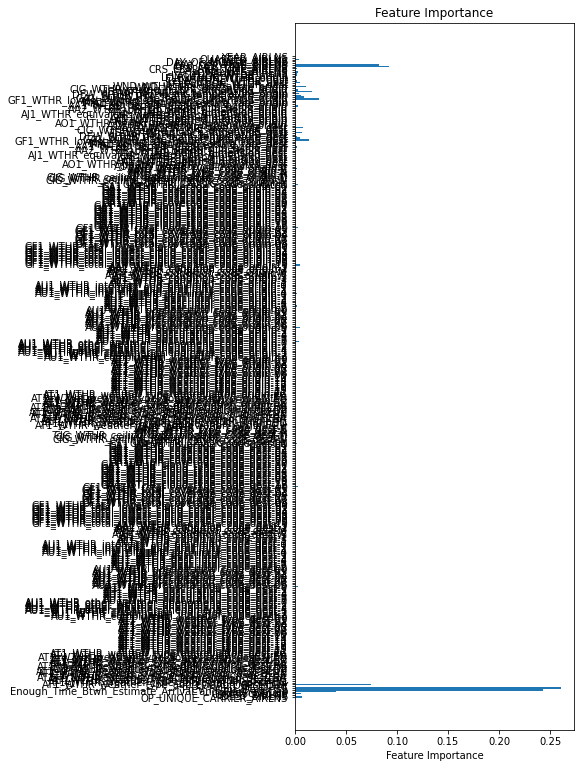

In [0]:
spark.catalog.clearCache()

features = [i for i in df.columns if i != "DEP_DEL15_AIRLNS"]
str_cols = [t[0] for t in df.dtypes if t[1] == 'string' and t[0] in features]
features.remove('FL_DATE_AIRLNS')
X_vars = features
y_var = 'DEP_DEL15_AIRLNS'

# train/test split
df_train = df.filter(F.col('YEAR_AIRLNS')<=2018)
df_test = df.filter(F.col('YEAR_AIRLNS')==2019)

# undersample train
df_train = undersample(df_train)

# make it a bit smaller for computation
df_train = df_train.sample(.7, seed=1)

# select fields we're using
df_train = df_train.select(X_vars + [y_var])
df_test = df_test.select(X_vars + [y_var])

# clean
df_train = clean_data_for_tree_model(df_train)

# put data into the pyspark form
vectorAssembler = VectorAssembler(inputCols = X_vars, outputCol = 'features', handleInvalid='skip')
df_train = vectorAssembler.transform(df_train).select(['features', y_var])
# df_test = vectorAssembler.transform(df_test).select(['features', y_var])

# cache data
# df_train.cache()
# df_test.cache()
# print(f'train row count {df_train.count()}')
# print(f'test row count {df_test.count()}')

# fit model
rf = RandomForestClassifier(featuresCol="features", labelCol=y_var, maxBins=370,
                             maxDepth=6, numTrees=100, featureSubsetStrategy='sqrt', 
                             subsamplingRate=.7).fit(df_train)


# varimp plot
list_extract = []
for i in df_train.schema['features'].metadata["ml_attr"]["attrs"]:
    list_extract = list_extract + df_train.schema['features'].metadata["ml_attr"]["attrs"][i]
varlist = pd.DataFrame(list_extract)
varlist['score'] = varlist['idx'].apply(lambda x: rf.featureImportances[x])
varlist.sort_values('score', ascending = False)

fig, ax = plt.subplots(figsize=(5, 13))
x = np.arange(len(varlist.name))
ax.barh(x, varlist.score)
ax.set_yticks(np.arange(len(varlist.name)))
ax.set_yticklabels(varlist.name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')
print("")

### Looking at the top 10% most important features

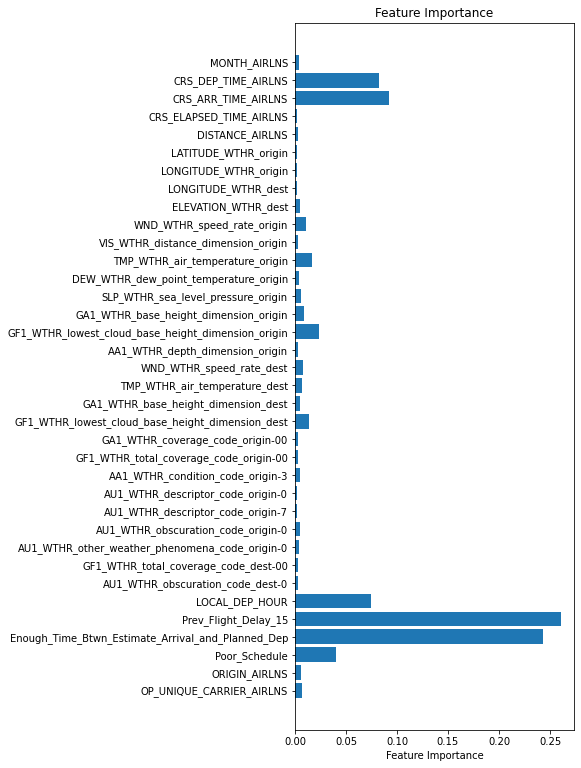

In [0]:
varlist2 = varlist.loc[varlist.score >= np.quantile(varlist.score, .9),:]

fig, ax = plt.subplots(figsize=(5, 13))
x = np.arange(len(varlist2.name))
ax.barh(x, varlist2.score)
ax.set_yticks(np.arange(len(varlist2.name)))
ax.set_yticklabels(varlist2.name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')
print("")

# Cross Validation

Using only 25% of the training data to speed up cross validation time.

In [0]:
spark.catalog.clearCache()
df = spark.read.parquet(f"{blob_url}/all_time_full_join_6")

# select explanatory vars
X_vars = [
    # time vars
    'YEAR_AIRLNS', 'QUARTER_AIRLNS', 'MONTH_AIRLNS', 'DAY_OF_WEEK_AIRLNS', 'CRS_DEP_TIME_AIRLNS', 'CRS_ARR_TIME_AIRLNS', 
    
    # airport location stuff
    'CRS_ELAPSED_TIME_AIRLNS', 'DISTANCE_AIRLNS', 'ELEVATION_WTHR_origin', 'ELEVATION_WTHR_dest', 
    'LATITUDE_WTHR_origin', 'LONGITUDE_WTHR_origin', 'LATITUDE_WTHR_dest', 'LONGITUDE_WTHR_dest',
    
    # airport cat vars to encode/index
    'ORIGIN_AIRLNS', 'DEST_AIRLNS', 'OP_UNIQUE_CARRIER_AIRLNS', 
    
    # weather vars origin
    'WND_WTHR_direction_angle_origin', 'WND_WTHR_speed_rate_origin', 'TMP_WTHR_air_temperature_origin', 'DEW_WTHR_dew_point_temperature_origin',
    'VIS_WTHR_distance_dimension_origin', 'GA1_WTHR_base_height_dimension_origin', 'GF1_WTHR_lowest_cloud_base_height_dimension_origin', 
    'AA1_WTHR_period_quantity_in_hours_origin', 'AA1_WTHR_depth_dimension_origin', 'AA2_WTHR_depth_dimension_origin', 
    'AJ1_WTHR_equivalent_water_depth_dimension_origin', 'AN1_WTHR_depth_dimension_origin', 
    'AL1_WTHR_period_quantity_origin', 'AL1_WTHR_depth_dimension_origin', 'SLP_WTHR_sea_level_pressure_origin',
    'GA1_WTHR_coverage_code_origin-00', 'GF1_WTHR_total_coverage_code_origin-00', 'AA1_WTHR_condition_code_origin-3', 'AU1_WTHR_descriptor_code_origin-0',
    'AU1_WTHR_descriptor_code_origin-7', 'AU1_WTHR_obscuration_code_origin-0', 'AU1_WTHR_other_weather_phenomena_code_origin-0', 

    # same weather vars, but for dest
    'WND_WTHR_direction_angle_dest', 'WND_WTHR_speed_rate_dest', 'TMP_WTHR_air_temperature_dest', 'DEW_WTHR_dew_point_temperature_dest',
    'VIS_WTHR_distance_dimension_dest', 'GA1_WTHR_base_height_dimension_dest', 'GF1_WTHR_lowest_cloud_base_height_dimension_dest', 
    'AA1_WTHR_period_quantity_in_hours_dest', 'AA1_WTHR_depth_dimension_dest', 'AA2_WTHR_depth_dimension_dest', 
    'AJ1_WTHR_equivalent_water_depth_dimension_dest', 'AN1_WTHR_depth_dimension_dest', 
    'AL1_WTHR_period_quantity_dest', 'AL1_WTHR_depth_dimension_dest', 'SLP_WTHR_sea_level_pressure_dest', 
    'GA1_WTHR_coverage_code_dest-00', 'GF1_WTHR_total_coverage_code_dest-00', 'AA1_WTHR_condition_code_dest-3', 'AA1_WTHR_condition_code_dest-3',
    'AU1_WTHR_descriptor_code_dest-7', 'AU1_WTHR_obscuration_code_dest-0', 'AU1_WTHR_other_weather_phenomena_code_dest-0', 
    
    # esther feature eng
    'LOCAL_DEP_HOUR', 'HOLIDAY', 'Prev_Flight_Delay_15', 'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep', 'Poor_Schedule'
]

X_vars = list(set(X_vars))
y_var = 'DEP_DEL15_AIRLNS'


# i think we need FL_DATE_AIRLNS for the make_cv_folds function
df = df.select(X_vars + [y_var] + ['FL_DATE_AIRLNS'])
df = clean_data_for_tree_model(df)

# train/test split
df_train = df.filter(F.col('YEAR_AIRLNS')<=2018)
df_test = df.filter(F.col('YEAR_AIRLNS')==2019)

# use a small piece of the data to speed things up
# remember to run undersample(df_train) when we're not doing CV. This is baked into the evaluate_cross_folds func
df_train = df_train.sample(.25, seed=1) 
# df_train.cache()
# print(f'df_train count: {df_train.count()}')


# evaluate through 5-fold cv
folds = make_cv_folds(df_train)

# collect results like this
cv_results_all = {}
cv_results_all['maxDepth'] = []
cv_results_all['numTrees'] = []
cv_results_all['subsamplingRate'] = []

cv_results_all['train_f1_score'] = []
cv_results_all['test_f1_score'] = []
cv_results_all['train_f2_score'] = []
cv_results_all['test_f2_score'] = []


# this tests out 3*2*2 = 12 configurations
for maxDepth_ in [7, 10, 12]:
    for numTrees_ in [50, 70]:
        for subsamplingRate_ in [.8, 1]:
                    
            rf = RandomForestClassifier(featuresCol="features", labelCol=y_var, maxBins=370
                                        ,maxDepth=maxDepth_
                                        ,numTrees=numTrees_
                                        ,featureSubsetStrategy='sqrt'
                                        ,subsamplingRate=subsamplingRate_)

            fit_results = evaluate_cross_folds(folds, model=rf, features=X_vars, y_var='DEP_DEL15_AIRLNS')
            
            cv_results_all['maxDepth'].append(maxDepth_)
            cv_results_all['numTrees'].append(numTrees_)
            cv_results_all['subsamplingRate'].append(subsamplingRate_)

            cv_results_all['train_f1_score'].append(np.mean(fit_results[0]['f1_score']))
            cv_results_all['test_f1_score'].append(np.mean(fit_results[1]['f1_score']))
            cv_results_all['train_f2_score'].append(np.mean(fit_results[0]['f2_score']))
            cv_results_all['test_f2_score'].append(np.mean(fit_results[1]['f2_score']))

#
cv_results_df = pd.DataFrame(cv_results_all)
cv_results_df.sort_values('test_f2_score', ascending=False)

Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Fitting model 1 of 5
Fitting model 2 of 5
Fitting model 3 of 5
Fitting model 4 of 5
Fitting model 5 of 5
Out[93]:

maxDepth 
 numTrees 
 subsamplingRate 
 train_f1_score 
 test_f1_score 
 train_f2_score 
 test_f2_score 
 
 
 
 
 9 
 12 
 50 
 1.0 
 0.701195 
 0.514884 
 0.656946 
 0.567804 
 
 
 8 
 12 
 50 
 0.8 
 0.697946 
 0.515368 
 0.653526 
 0.567428 
 
 
 11 
 12 
 70 
 1.0 
 0.699738 
 0.515059 
 0.655416 
 0.567240 
 
 
 10 
 12 
 70 
 0.8 
 0.700664 
 0.515185 
 0.655952 
 0.567112 
 
 
 5 
 10 
 50 
 1.0 
 0.690683 
 0.507685 
 0.648033 
 0.562593 
 
 
 7 
 10 
 70 
 1.0 
 0.690053 
 0.508399 
 0.646801 
 0.562246 
 
 
 6 
 10 
 70 
 0.8 
 0.689684 
 0.508974 
 0.645415 
 0.562077 
 
 
 4 
 10 
 50 
 0.8 
 0.690212 
 0.509169 
 0.646236 
 0.562059 
 
 
 3 
 7 
 70 
 1.0 
 0.675845 
 0.491933 
 0.634129 
 0.551003 
 
 
 2 
 7 
 70 
 0.8 
 0.675380 
 0.493018 
 0.632693 
 0.550835 
 
 
 1 
 7 
 50 
 1.0 
 0.675759 
 0.492349 
 0.633544 
 0.550337 
 
 
 0 
 7 
 50 
 0.8 
 0.675622 
 0.494759 
 0.632063 
 0.549409

Results

```
	maxDepth	numTrees	subsamplingRate	train_f1_score	test_f1_score	train_f2_score	test_f2_score
9	12	50	1.0	0.701195	0.514884	0.656946	0.567804
8	12	50	0.8	0.697946	0.515368	0.653526	0.567428
11	12	70	1.0	0.699738	0.515059	0.655416	0.567240
10	12	70	0.8	0.700664	0.515185	0.655952	0.567112
5	10	50	1.0	0.690683	0.507685	0.648033	0.562593
7	10	70	1.0	0.690053	0.508399	0.646801	0.562246
```

# Final RF

Fit a final RF on full training data with final selected hyperparams.

In [0]:
spark.catalog.clearCache()
df = spark.read.parquet(f"{blob_url}/all_time_full_join_6")

# select explanatory vars
X_vars = [
    # time vars
    'YEAR_AIRLNS', 'QUARTER_AIRLNS', 'MONTH_AIRLNS', 'DAY_OF_WEEK_AIRLNS', 'CRS_DEP_TIME_AIRLNS', 'CRS_ARR_TIME_AIRLNS', 
    
    # airport location stuff
    'CRS_ELAPSED_TIME_AIRLNS', 'DISTANCE_AIRLNS', 'ELEVATION_WTHR_origin', 'ELEVATION_WTHR_dest', 
    'LATITUDE_WTHR_origin', 'LONGITUDE_WTHR_origin', 'LATITUDE_WTHR_dest', 'LONGITUDE_WTHR_dest',
    
    # airport cat vars to encode/index
    'ORIGIN_AIRLNS', 'DEST_AIRLNS', 'OP_UNIQUE_CARRIER_AIRLNS', 
    
    # weather vars origin
    'WND_WTHR_direction_angle_origin', 'WND_WTHR_speed_rate_origin', 'TMP_WTHR_air_temperature_origin', 'DEW_WTHR_dew_point_temperature_origin',
    'VIS_WTHR_distance_dimension_origin', 'GA1_WTHR_base_height_dimension_origin', 'GF1_WTHR_lowest_cloud_base_height_dimension_origin', 
    'AA1_WTHR_period_quantity_in_hours_origin', 'AA1_WTHR_depth_dimension_origin', 'AA2_WTHR_depth_dimension_origin', 
    'AJ1_WTHR_equivalent_water_depth_dimension_origin', 'AN1_WTHR_depth_dimension_origin', 
    'AL1_WTHR_period_quantity_origin', 'AL1_WTHR_depth_dimension_origin', 'SLP_WTHR_sea_level_pressure_origin',
    'GA1_WTHR_coverage_code_origin-00', 'GF1_WTHR_total_coverage_code_origin-00', 'AA1_WTHR_condition_code_origin-3', 'AU1_WTHR_descriptor_code_origin-0',
    'AU1_WTHR_descriptor_code_origin-7', 'AU1_WTHR_obscuration_code_origin-0', 'AU1_WTHR_other_weather_phenomena_code_origin-0', 

    # same weather vars, but for dest
    'WND_WTHR_direction_angle_dest', 'WND_WTHR_speed_rate_dest', 'TMP_WTHR_air_temperature_dest', 'DEW_WTHR_dew_point_temperature_dest',
    'VIS_WTHR_distance_dimension_dest', 'GA1_WTHR_base_height_dimension_dest', 'GF1_WTHR_lowest_cloud_base_height_dimension_dest', 
    'AA1_WTHR_period_quantity_in_hours_dest', 'AA1_WTHR_depth_dimension_dest', 'AA2_WTHR_depth_dimension_dest', 
    'AJ1_WTHR_equivalent_water_depth_dimension_dest', 'AN1_WTHR_depth_dimension_dest', 
    'AL1_WTHR_period_quantity_dest', 'AL1_WTHR_depth_dimension_dest', 'SLP_WTHR_sea_level_pressure_dest', 
    'GA1_WTHR_coverage_code_dest-00', 'GF1_WTHR_total_coverage_code_dest-00', 'AA1_WTHR_condition_code_dest-3',
    'AU1_WTHR_descriptor_code_dest-7', 'AU1_WTHR_obscuration_code_dest-0', 'AU1_WTHR_other_weather_phenomena_code_dest-0', 
    
    # esther feature eng
    'LOCAL_DEP_HOUR', 'HOLIDAY', 'Prev_Flight_Delay_15', 'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep', 'Poor_Schedule'
]



y_var = 'DEP_DEL15_AIRLNS'


df = df.select(X_vars + [y_var] + ['FL_DATE_AIRLNS'])
df = clean_data_for_tree_model(df)

# train/test split
df_train = df.filter(F.col('YEAR_AIRLNS')<=2018)
# df_test = df.filter(F.col('YEAR_AIRLNS')==2019)

# downsample
df_train = undersample(df_train)

# put data into the pyspark form
vectorAssembler = VectorAssembler(inputCols = X_vars, outputCol = 'features', handleInvalid='skip')
df_train = vectorAssembler.transform(df_train).select(['features', y_var])
# df_test = vectorAssembler.transform(df_test).select(['features', y_var])

rf_final = RandomForestClassifier(featuresCol="features", labelCol=y_var, maxBins=370
                                        ,maxDepth=12
                                        ,numTrees=50
                                        ,featureSubsetStrategy='sqrt'
                                        ,subsamplingRate=.8).fit(df_train)
print(rf_final)
model_path = 'files/shared_uploads/trevorj@berkeley.edu/rf_0409_v2'
rf_final.save(model_path) 


RandomForestClassificationModel: uid=RandomForestClassifier_4e62433bc1e2, numTrees=50, numClasses=2, numFeatures=65

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1858507102394636> in <module> 
 63 print ( rf_final ) 
 64 model_path = 'files/shared_uploads/trevorj@berkeley.edu/rf_0409' 
 ---> 65 rf_final . save ( model_path ) 

 /databricks/spark/python/pyspark/ml/util.py in save (self, path) 
 355 def save ( self , path ) : 
 356 """Save this ML instance to the given path, a shortcut of 'write().save(path)'.""" 
 --> 357 self . write ( ) . save ( path ) 
 358 
 359 

 /databricks/spark/python/pyspark/ml/util.py in save (self, path) 
 306 if not isinstance ( path , str ) : 
 307 raise TypeError ( "path should be a string, got type %s" % type ( path ) ) 
 --> 308 self . _jwrite . save ( path ) 
 309 
 310 def overwrite ( self ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 115 def deco ( * a , ** kw ) : 
 116 try : 
 --> 117 return f ( * a , ** kw ) 
 118 except py4j . protocol . Py4JJavaError as e : 
 119 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o111023.save.
: java.io.IOException: Path files/shared_uploads/trevorj@berkeley.edu/rf_0409 already exists. To overwrite it, please use write.overwrite().save(path) for Scala and use write().overwrite().save(path) for Java and Python.
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:683)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:167)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

# Running data clean steps again to save my Indexer object

In [0]:
df = df.filter(F.col('YEAR_AIRLNS')<=2018)

# load the final fitted model
model_path = 'files/shared_uploads/trevorj@berkeley.edu/rf_0409_v2'
# rf_fit = RandomForestClassificationModel.load('dbfs:/' + model_path)

# vars to use in the model
X_vars = [
# time vars
'YEAR_AIRLNS', 'QUARTER_AIRLNS', 'MONTH_AIRLNS', 'DAY_OF_WEEK_AIRLNS', 'CRS_DEP_TIME_AIRLNS', 'CRS_ARR_TIME_AIRLNS', 

# airport location stuff
'CRS_ELAPSED_TIME_AIRLNS', 'DISTANCE_AIRLNS', 'ELEVATION_WTHR_origin', 'ELEVATION_WTHR_dest', 
'LATITUDE_WTHR_origin', 'LONGITUDE_WTHR_origin', 'LATITUDE_WTHR_dest', 'LONGITUDE_WTHR_dest',

# airport cat vars to encode/index
'ORIGIN_AIRLNS', 'DEST_AIRLNS', 'OP_UNIQUE_CARRIER_AIRLNS', 

# weather vars origin
'WND_WTHR_direction_angle_origin', 'WND_WTHR_speed_rate_origin', 'TMP_WTHR_air_temperature_origin', 'DEW_WTHR_dew_point_temperature_origin',
'VIS_WTHR_distance_dimension_origin', 'GA1_WTHR_base_height_dimension_origin', 'GF1_WTHR_lowest_cloud_base_height_dimension_origin', 
'AA1_WTHR_period_quantity_in_hours_origin', 'AA1_WTHR_depth_dimension_origin', 'AA2_WTHR_depth_dimension_origin', 
'AJ1_WTHR_equivalent_water_depth_dimension_origin', 'AN1_WTHR_depth_dimension_origin', 
'AL1_WTHR_period_quantity_origin', 'AL1_WTHR_depth_dimension_origin', 'SLP_WTHR_sea_level_pressure_origin',
'GA1_WTHR_coverage_code_origin-00', 'GF1_WTHR_total_coverage_code_origin-00', 'AA1_WTHR_condition_code_origin-3', 'AU1_WTHR_descriptor_code_origin-0',
'AU1_WTHR_descriptor_code_origin-7', 'AU1_WTHR_obscuration_code_origin-0', 'AU1_WTHR_other_weather_phenomena_code_origin-0', 

# same weather vars, but for dest
'WND_WTHR_direction_angle_dest', 'WND_WTHR_speed_rate_dest', 'TMP_WTHR_air_temperature_dest', 'DEW_WTHR_dew_point_temperature_dest',
'VIS_WTHR_distance_dimension_dest', 'GA1_WTHR_base_height_dimension_dest', 'GF1_WTHR_lowest_cloud_base_height_dimension_dest', 
'AA1_WTHR_period_quantity_in_hours_dest', 'AA1_WTHR_depth_dimension_dest', 'AA2_WTHR_depth_dimension_dest', 
'AJ1_WTHR_equivalent_water_depth_dimension_dest', 'AN1_WTHR_depth_dimension_dest', 
'AL1_WTHR_period_quantity_dest', 'AL1_WTHR_depth_dimension_dest', 'SLP_WTHR_sea_level_pressure_dest', 
'GA1_WTHR_coverage_code_dest-00', 'GF1_WTHR_total_coverage_code_dest-00', 'AA1_WTHR_condition_code_dest-3',
'AU1_WTHR_descriptor_code_dest-7', 'AU1_WTHR_obscuration_code_dest-0', 'AU1_WTHR_other_weather_phenomena_code_dest-0', 

# esther feature eng
'LOCAL_DEP_HOUR', 'HOLIDAY', 'Prev_Flight_Delay_15', 'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep', 'Poor_Schedule'
]
features=X_vars

y_var = 'DEP_DEL15_AIRLNS'

# create an id column for final join
df = df.withColumn("rf_id", F.monotonically_increasing_id())

df2 = df.alias('df2')

# cast to int
str_cols = ['Prev_Flight_Delay_15', 'Poor_Schedule', 'Enough_Time_Btwn_Estimate_Arrival_and_Planned_Dep']
for column in str_cols:
    df2 = df2.withColumn(column, F.col(column).cast(types.IntegerType())) 

# impute some missing values
df2 = df2.na.fill(0)

# get fields
features = [i for i in df2.columns if i != "DEP_DEL15_AIRLNS"]
str_cols = [t[0] for t in df2.dtypes if t[1] == 'string' and t[0] in features]
# drop some features
#features.remove('FL_DATE_AIRLNS')

# index all str columns    
vars_to_index = [i for i in str_cols if i != 'FL_DATE_AIRLNS']

# rename cols to drop them later
for var in vars_to_index:
    df2 = df2.withColumnRenamed(var, var+'_old')

# finally, index them
indexer = StringIndexer(inputCols=[i+'_old' for i in vars_to_index], outputCols=vars_to_index).fit(df2)
indexer.save('files/shared_uploads/trevorj@berkeley.edu/rf_indexer_2')

# df = indexer.fit(df).transform(df)
# df = df.drop(*[i+'_old' for i in vars_to_index])
# rf_indexer = StringIndexerModel.load('dbfs:/' + 'files/shared_uploads/trevorj@berkeley.edu/rf_indexer_1')
# df2 = rf_indexer.transform(df2)
# df2 = df2.drop(*[i+'_old' for i in vars_to_index])
